# 3 . Regresssion

**Regressions**
- Robust reggression 
- Multiple regression with statsmodels, Multiple Regression and Feature Importance
- OLS and Gradient Descent 
- Regularized Regression( restrict overfitting) - Ridge, Lasso, Elastic Net
- Polynomial Regression. FOr models that are not Linear

**Performance Evaluation**
- How does it perform when it is put of sample? 

**Dealing with Non-linear Relationships**
- Decision Tree, Random Forest, AdaBoost

**Feature Importance**

**Data Pre-processing**
- standardization / Mean removal / Variance Scaling
- Min-Max or Scaling Features to a Range
- Normalization
- Binarization
- Encoding categorical features
   - labelEncoder
   - One Hot / One-of-K encodeing
        
**Variance Bias trade off**
- Validation Curve 
- Learning Curve

**Cross Validation** 
- Hold out CV
- k-fold CV
- Stratified k-fold


### Regression

Regression deals with Continuous variables. You use the explanatory variable to predict the outcome.
x = is the predictor/explanatory variable/independent variable
Y = dependent variable/outcome
eg use crime rate and room size to predict house value

### Reinforcement learning
Trying to develop a system or agent that improves performance based on feedback or interactions with the environment. This was used by Google on the game of GO.
Its neither supervised ( not given labeled data, not left by itself either) 
- given ana agent to learn what the utility function. the agent(system( learn the action function and the value function.
Learning "..to every action there is a reaction". Does it get a reward or an punishment.

JPMorgan has a reinforcment agent on the stock market. Apric

### Unsupervised 
Exploratory data analysis. Feed raw data and the algorithm will cluster to meaningful subgroups.

## Scikit-learn 
- https://scikit-learn.org/stable/

It makes use of numpy and is compatible with pandas.
Ususlly, Colums are features and rows are data samples

# Robust Regression 

Outlier example = https://digitalfirst.bfwpub.com/stats_applet/stats_applet_5_correg.html

Linear regression is heaviliy impacted by the presence of outliars. The can destry the Linear regression fit. 
Detecting utliars could be done wththings like residual outliars . Instead we are going to look at RANSAC which gives us the robustness.
- NOTE: Data science requires some understanding of the domain that your modeling in. 

## RANdom SAmple Consensus (RANSAC) Algorithm
link = https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html

RANSAC is an iterative algorithm for the robust estimation of parameters from a subset of inliers from the complete data set. So rather than work with the entire data set it automatically samples and will try to identify the outliers and exclude them from the modeling. 


Each of the Algorithm iteration performs the following steps:
1. Select `min_sample` random samples from the original data and check weather the set of data is valid (see is_data_valid).
2. Fit a model to the random subset (`base_estimator.fit`) and check weather the estimated model is valid (see `is_model_valid`).
3. Classify all data as inliers or outliers by calculating the residuals to the estimated model(`base_estmimator.predict(X) - y`) - all data samples with absolute residuals smaller than the `residual_threshold` are considered as inliers. `residual_threshold` will be a hyperparameter.
4. Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('housing.data',delim_whitespace=True, header=None)

In [13]:
col_name = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [14]:
df.columns = col_name

In [140]:
X = df['CHAS'].values.reshape(-1,1)
y = df['MEDV'].values

In [141]:
from sklearn.linear_model import RANSACRegressor

In [142]:
ransac = RANSACRegressor()

In [143]:
ransac.fit(X,y)

RANSACRegressor()

In [144]:
inlier_mask = ransac.inlier_mask_              # We get all the inliers from the ransac default method
outlier_mask = np.logical_not(inlier_mask)     # here; anything that is NOT an inlier, is an outlier

In [145]:
line_X = np.arange(3,10,1)                           # array to represent rooms of 3 - 9 for the prediction 
line_y_ransac = ransac.predict(line_X.reshape(-1,1)) # format the array to 1 dimensions and make a prediction

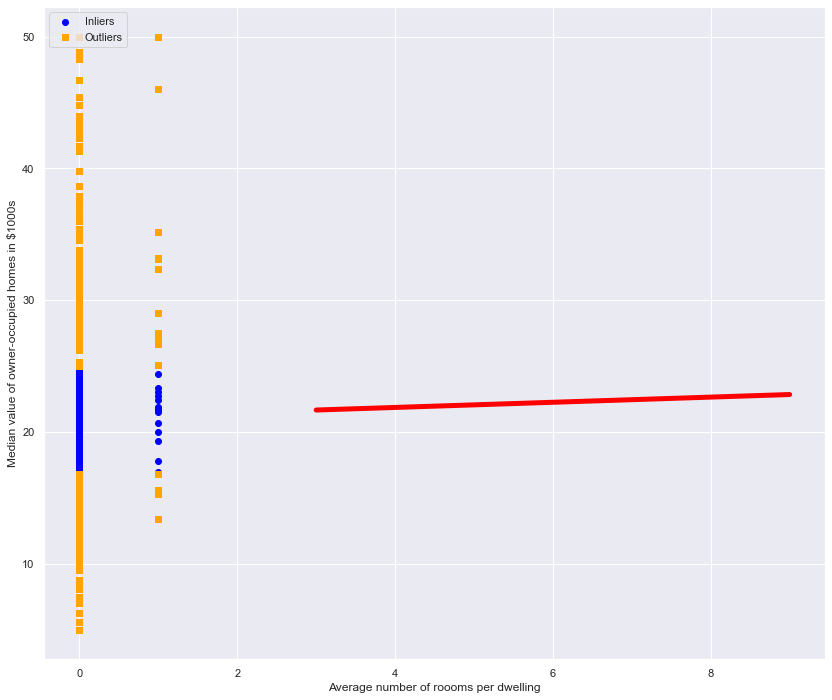

In [146]:
sns.set(style='darkgrid',context='notebook')
plt.figure(figsize=(14,12));

plt.scatter(X[inlier_mask],y[inlier_mask],
           c='blue', marker='o',label='Inliers')

plt.scatter(X[outlier_mask],y[outlier_mask],
           c='orange', marker='s',label='Outliers')

plt.plot(line_X, line_y_ransac, color='red',linewidth=5)

plt.xlabel('Average number of roooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.legend(loc='upper left')
plt.show()

In [80]:
ransac.estimator_.coef_

array([-1.05021727])

In [81]:
ransac.estimator_.intercept_

22.777023911134098

# Evaluate Model Performance of Regression Models

### Training and testing data 
We want to be able to keep some of our data from our model so it is not tarnished and seen by the model. There are some recommendations in how to split your data.
30-20% is a normal size for the training data so your model doesn't see some data.
60% train, 20% holdout and 20% test.

In [82]:
from sklearn.model_selection import train_test_split

In [156]:
# X = df['CHAS'].values.reshape(-1,1)
X = df.iloc[:,:-1].values

In [159]:
y = df['MEDV'].values

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) 

In [161]:
from sklearn.linear_model import LinearRegression

In [162]:
LR = LinearRegression()

In [163]:
LR.fit(X_train,y_train)

LinearRegression()

In [164]:
y_train_pred = LR.predict(X_train)

In [165]:
y_test_pred = LR.predict(X_test)

## Method 1: Residual Analysis

A **residual** is a measure of how well a line fits an individual data point. This vertical distance is known as a residual. For data points above the line, the residual is positive, and for data points below the line, the residual is negative. The closer a data point's residual is to 0, the better the fit.

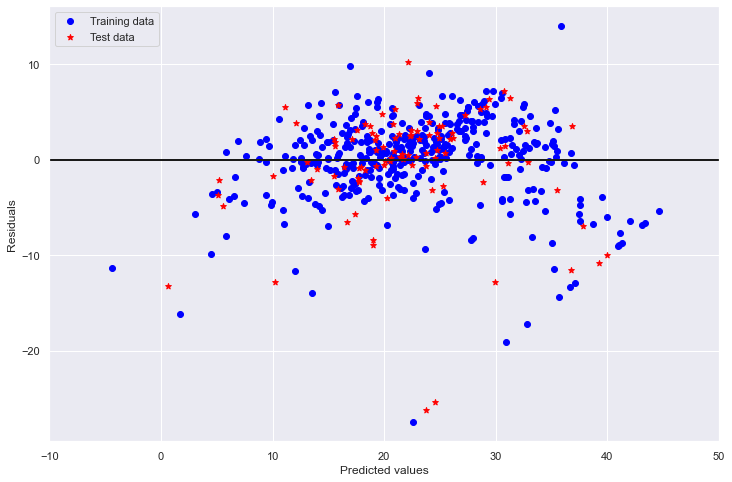

In [166]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='red', marker='*', label='Test data' )
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

# Method 2: Mean Squared Error (MSE)
(Sometimes also root MSE , where you take the root of the value.)

- The average value of the Sums of Squared cost function
- Useful for comparing different regression models
- For tuning parameters via a grid search and cross-validation

In [167]:
from sklearn.metrics import mean_squared_error

In [168]:
# gets the MSE of the 'y_train' vs the 'y train predicted'
mean_squared_error(y_train, y_train_pred)

19.326470203585725

In [169]:
# greater error out of sample
mean_squared_error(y_test, y_test_pred)

33.448979997676474

# Method 3: Coefficiet of Determination, R^2

$R^2 = 1 - \frac{SSE}{SST}$

SSE: Sum of squared errros

SST: Total sum of squares

In [170]:
from sklearn.metrics import r2_score

In [171]:
r2_score(y_train, y_train_pred)       

0.7730135569264234

In [172]:
r2_score(y_test,y_test_pred)

0.5892223849182514

# What does a Near Perfect Model look like?

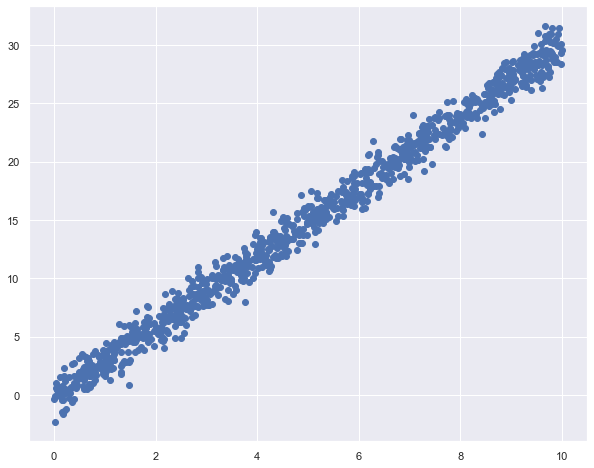

In [173]:
# create a near perfect model to make a comparisson
generate_randon = np.random.RandomState(0)
x = 10 * generate_randon.rand(1000)
y = 3 * x + np.random.randn(1000)
plt.figure(figsize= (10, 8))
plt.scatter(x , y)
plt.show()

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)# ransom state is like the seed

In [176]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1,1),y_train)

# now we run our prediction
y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

# Method 1: Plot the Residul Analysis

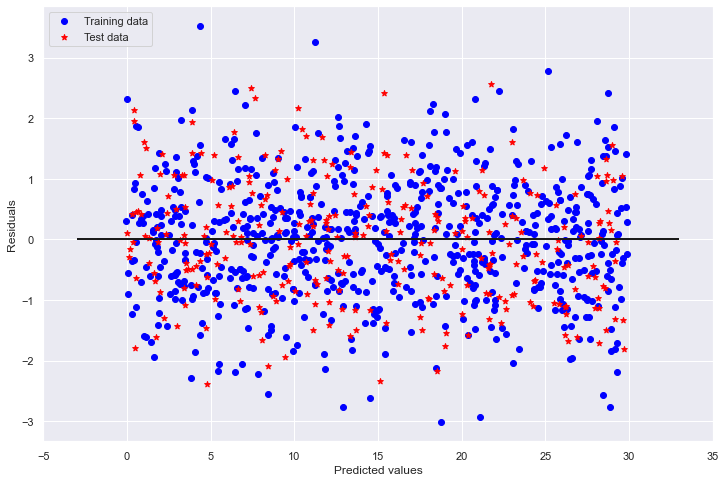

In [177]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='red', marker='*', label='Test data' )
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5, 35])
plt.show()

# What we can see is there an overlap of the test and the train. 
# Red is the test data , blue is trainnign data. Same range


# Method 2 : Mean Squared Error (MSE)

In [178]:
# In sample
mean_squared_error(y_train,y_train_pred)

0.9802123686550911

In [179]:
# Out of sample
mean_squared_error(y_test,y_test_pred)

0.937264114664772

# Method 3: Coefficient of Determination, $R^2$

In [180]:
r2_score(y_train,y_train_pred)

0.9871200591637344

In [181]:
r2_score(y_test,y_test_pred)

0.9882773741507768

*** 

# Yet to be covered

- Mean Absolute Error 
- Stratified Shuffle Split : Shuffle the data rather than cut it at 80,70%
- Feature Engineering Eg: Combining Features, designing derivative features
- Data preparation Eg: Missing values etc
- Categorical features
- Transform data / feature scaling . Scikit-learn Pipeline
- Fine Tuning Eg: Grid Search , Randomised Search
- Ensemble Methods

# Multiple Regression
This is an expansion on Univariate ( single feature to explian our target variable). Multiple regression will look at multiple features to look explain our target variable. 

Simple Linear Regression

$y = \beta_0 + \beta_1 X$

Multiple Linear Regression

$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ...$


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline # wil lplot within the notebok rather than writing plt.show()
import seaborn as sns

In [182]:
from sklearn.datasets import load_boston

In [204]:
boston_data = load_boston()

In [236]:
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)


,CRIM,ZN,INDUS,CHAS,NOX,RM
0,0.00632,18.0,2.31,0.0,0.538,6.575
1,0.02731,0.0,7.07,0.0,0.469,6.421
2,0.02729,0.0,7.07,0.0,0.469,7.185
3,0.03237,0.0,2.18,0.0,0.458,6.998
4,0.06905,0.0,2.18,0.0,0.458,7.147
...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593
502,0.04527,0.0,11.93,0.0,0.573,6.120
503,0.06076,0.0,11.93,0.0,0.573,6.976
504,0.10959,0.0,11.93,0.0,0.573,6.794


In [237]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [330]:
df.shape # prints the shape of the data frame 

(506, 13)

In [331]:
#df
X = df.iloc[:, : ] # selects the first 6 colums of the houseing data

In [332]:
y = boston_data.target

# Statsmodel - Built in python lib

Statsmodels is for statistical modeling as an alternative to scikit-learn.

In [333]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf

 Slight difference in the way stats models is created. We need to add a constant term to allow statsmodels.api to calculate the bias/ intercepts. Otherwise the intercepts will be incorperated into the estimates. 

In [334]:
X_constant = sm.add_constant(X)

In [335]:
pd.DataFrame(X_constant)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0000,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,1.0000,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,1.0000,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,1.0000,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,1.0000,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0000,0.0626,0.0000,11.9300,0.0000,0.5730,6.5930,69.1000,2.4786,1.0000,273.0000,21.0000,391.9900,9.6700
502,1.0000,0.0453,0.0000,11.9300,0.0000,0.5730,6.1200,76.7000,2.2875,1.0000,273.0000,21.0000,396.9000,9.0800
503,1.0000,0.0608,0.0000,11.9300,0.0000,0.5730,6.9760,91.0000,2.1675,1.0000,273.0000,21.0000,396.9000,5.6400
504,1.0000,0.1096,0.0000,11.9300,0.0000,0.5730,6.7940,89.3000,2.3889,1.0000,273.0000,21.0000,393.4500,6.4800


In [336]:
# sm.OLS?



In [337]:
model = sm.OLS(y,X_constant)  # Ordinary Least Square 
model = sm.ols(formula = 'y ~ ')  # Ordinary Least Square 

AttributeError: module 'statsmodels.api' has no attribute 'ols'

In [338]:
LR = model.fit() # fit our model and assigning to be called Linear Regression

In [339]:
LR.summary() # gives a nice summary of many statistic values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          6.72e-135
Time:                        12:43:41   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There are a lot of statistical tests and information. Mostly for the purpose of statistical analysis.

You do not need all of these for data science.

Data science focus is on prediction and having models that work on predicting real data. It is not concerned as much with correct specifications of statistical problems.

## Model Statistical Outputs:

**Dep. Variable**: The dependent variable or target variable

**Model**: Highlight the model used to obtain this output. It is OLS here. Ordinary least squares / Linear regression

**Method**: The method used to fit the data to the model. Least squares

**No. Observations**: The number of observations

**DF Residuals**: The degrees of freedom of the residuals. Calculated by taking the number of observations less the number of parameters

**DF Model**: The number of estimated parameters in the model. In this case 13. The constant term is not included.

**R-squared**: This is the coefficient of determination. Measure of goodness of fit. Tells you how much your model can explain the variability of the data. The more parameters you add to your model , the more this value will go up. 

$$R^2=1-\frac{SS_{res}}{SS_{tot}}$$

> From [wiki](https://en.wikipedia.org/wiki/Coefficient_of_determination),

  > The total sum of squares, $SS_{tot}=\sum_i(y_i-\bar{y})^2$

  > The regression sum of squares (explained sum of squares), $SS_{reg}=\sum_i(f_i-\bar{y})^2$

  > The sum of squares of residuals (residual sum of squares), $SS_{res}=\sum_i(y_i-f_i)^2 = \sum_ie^2_i$

**Adj. R-squared**: This is the adjusted R-squared. It is the coefficient of determination adjusted by sample size and the number of parameters used. It is not normally used on Linear Regression. IT is trying to penalise the additional paramaters you add to your model. 
$$\bar{R}^2=1-(1-R^2)\frac{n-1}{n-p-1}$$

> $p$ = The total number of explanatory variables not including the constant term

> $n$ = The sample size

**F-statistic**: A measure that tells you if you model is different from a simple average or not. 

**p-value - Prob (F-statistic)**: This measures the significance of your F-statistic. Also called p-value of F-statistic. In statistics and before computeres got so powerful, a p-value equal or lower than 0.05 is considered significant, now it could be as low as 0.005.

**AIC**: This is the Akaike Information Criterion. It evaluatess the model based on the model complexity and number of observations. The lower the better. 

**BIC**: This is the Bayesian Information Criterion. Similar to AIC, except it pushishes models with more parameters.Again, The lower the better. 


## Parameters Estimates and the Associated Statistical Tests

**coef**: The estimated coefficient. Note that this is just a point estimate. By itself , it doesn't mean much. the best way to read the significance of a number is to compare it against the p-value.

**P > |t|**: The p-value. A measure of the probability that the coefficient is different from zero. the closer to zero, the more significant.

**std err**: The standard error of the estimate of the coefficient. Another term for standard deviation

**t**: The t-statistic score. This should be compared against a t-table.


**[95.0% Conf. Interval]**: The 95% confidence interval of the coefficient. Shown here as [0.025, 0.975], the lower and upper bound.


## Residual Tests
The residual has substantial significance. The reason is that the residual, after the model has explained the variability of the data, should have left a residual that is random , with normal distribution and not have any pattern. IF this is not the case the model has missed out on some signals. 

**Skewness**: This is a measure of the symmetry of the residuals around the mean. Zero if symmetrical. A positive value indicates a long tail to the right; a negative value a long tail to the left.

**Kurtosis**: This is a measure of the shape of the distribution of the residuals, the peakness. A normal distribution has a zero measure. A negative value points to a flatter than normal distribution; a positive one has a higher peak than normal distribution. 

**Omnibus D'Angostino's test**: This is a combined statistical test for skewness and kurtosis.

**Both Skewness and Kurtosis indiacte problems with the model**

**Prob(Omnibus)**: p-value of Omnibus test.

**Jarque-Bera**: This is a combined statistical test of skewness and kurtosis.

**Prob (JB)**: p-value of Jarque-Bera.

**Durbin-Watson**: This is a test for the presence of correlation among the residuals. This is especially important for time series modelling.

**Cond. No**: This is a test for multicollinearity. > 30 indicates unstable results. Meaning within your data some of explanitory factor share the same variance (they are correlated(.

## Exersisese

In [340]:
# Alternative to useing iloc is to edit the model.
form_lr = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',
                 data=df)
mlr = form_lr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          6.72e-135
Time:                        12:43:41   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Correlation Matrix
The correlation coeficient is a really useful diagnostic tool to identify collinearity between predictors. 

In [341]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix[np.abs(corr_matrix) < 0.6] = 0
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6255,0.0000,0.0000,0.0000,0.0000
ZN,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6644,0.0000,0.0000,0.0000,0.0000,0.0000
INDUS,0.0000,0.0000,1.0000,0.0000,0.7637,0.0000,0.6448,-0.7080,0.0000,0.7208,0.0000,0.0000,0.6038
CHAS,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
NOX,0.0000,0.0000,0.7637,0.0000,1.0000,0.0000,0.7315,-0.7692,0.6114,0.6680,0.0000,0.0000,0.0000
RM,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.6138
AGE,0.0000,0.0000,0.6448,0.0000,0.7315,0.0000,1.0000,-0.7479,0.0000,0.0000,0.0000,0.0000,0.6023
DIS,0.0000,0.6644,-0.7080,0.0000,-0.7692,0.0000,-0.7479,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RAD,0.6255,0.0000,0.0000,0.0000,0.6114,0.0000,0.0000,0.0000,1.0000,0.9102,0.0000,0.0000,0.0000
TAX,0.0000,0.0000,0.7208,0.0000,0.6680,0.0000,0.0000,0.0000,0.9102,1.0000,0.0000,0.0000,0.0000


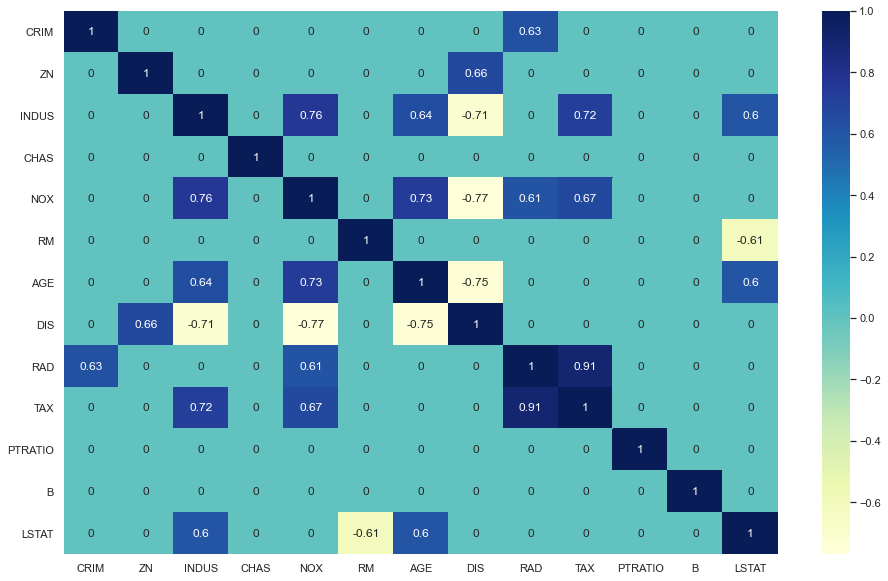

In [342]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu');

## Detecting collinearity with Eigenvectors

Use the numpy linear algebra eigen decomposition of the correlation matrix

In [343]:
eigenvalues, eigenvectors = np.linalg.eig(df.corr())

In [344]:
pd.Series(eigenvalues).sort_values()
# note that index 8, eignevalue of 0.0635, is near to zero or very samll compared to the others. 
# Small value represents presence of collineararity in that specific index.


8    0.0635
10   0.1693
11   0.1860
12   0.2202
9    0.2769
7    0.3961
6    0.5354
5    0.6574
4    0.8348
3    0.8576
2    1.2426
1    1.4333
0    6.1268
dtype: float64

In [345]:
# We can see that index 2,8 and 9 have the highet loading meaning 
# they contribute the most to the low value of the number 8 eigen value above
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False)

9    0.7202
8    0.6335
2    0.2511
1    0.0809
0    0.0460
5    0.0456
4    0.0436
6    0.0386
3    0.0359
12   0.0244
10   0.0234
7    0.0183
11   0.0045
dtype: float64

In [346]:
print(df.columns[2],df.columns[8],df.columns[9])
# These are the factors that are causeing the problem with collineararity

INDUS RAD TAX


# Feature Importance and Extractions

Check
1. The Direction of the coefficient. Is it going Up or Down. Positive or negative

2. Impact of the variable/ factor on the model. How significant is it to the scheme of things ( the model) 
- In order to measure the impact we need to standardise the variable. As an example, price of a house could range between 100k to 700k , compared to age with is just 0-100. We would want everything in the same range so nothing skews the model in to thinking it is more imporant than it actually is.

In [347]:
from sklearn.linear_model import LinearRegression

In [348]:
# create a linear model as a control
model = LinearRegression()

In [349]:
model.fit(X,y)

LinearRegression()

In [350]:
result = pd.DataFrame(list(zip(model.coef_, df.columns)), columns=['coefficient','name']).set_index('name')
np.abs(result).sort_values(by='coefficient',ascending=False)

,coefficient
name,
NOX,17.7666
RM,3.8099
CHAS,2.6867
DIS,1.4756
PTRATIO,0.9527
LSTAT,0.5248
RAD,0.3060
CRIM,0.1080
ZN,0.0464


In [354]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
Standard_coefficient_Linear_reg = make_pipeline(scalar, model) # make a sclaed pipeline from the scalar and the model

In [359]:
Standard_coefficient_Linear_reg.fit(X,y) # fit our data to our piepline model

result = pd.DataFrame(list(zip(Standard_coefficient_Linear_reg.steps[1][1].coef_,
                               df.columns)), 
                               columns=['coefficient','name']).set_index('name')

np.abs(result).sort_values(by='coefficient',ascending=False)
# As well as a reordering of importance , we can now see a narrower range of the coefficients of the values.

,coefficient
name,
LSTAT,3.7436
DIS,3.1040
RM,2.6742
RAD,2.6622
TAX,2.0768
PTRATIO,2.0606
NOX,2.0567
ZN,1.0816
CRIM,0.9281


# Use $R^2$ to identify key Features
- Compare $R^2$ of the model **VS** $R^2$ of the model **without the feature**
- A significance change in $R^2$ signifies the importance of the feature.

In [ ]:
from sklearn.metrics import r2_score

In [360]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',
                 data=df)
benchmark = linear_reg.fit()
r2_score(y, benchmark.predict(df))


0.7406426641094095

In [361]:
# --- without LSTAT - Low status: most significant coefficient 
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B',
                 data=df)
benchmark = linear_reg.fit()
r2_score(y, benchmark.predict(df))


0.6842042799773889

In [363]:
# --- Without DIS 
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + RAD + TAX + PTRATIO + B + LSTAT',
                 data=df)
benchmark = linear_reg.fit()
WOdis = r2_score(y, benchmark.predict(df))
print(WOdis)

0.7089845550392362


In [364]:
# --- Without RM : Significant feature
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',
                 data=df)
benchmark = linear_reg.fit()
woRM = r2_score(y, benchmark.predict(df))
print(woRM)

0.6968344625005227
